In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
from tools_ryu import mytool
from tools_ryu.cross_sectional_v5 import CrossSectional

In [2]:
cmktcap = pd.read_pickle("Data/cmktcap_data_final.pickle")
cmktcap_reduced = pd.read_pickle("Data/cmktcap_data_reduced.pickle")
binance = pd.read_pickle("Data/binance_data_pp.pickle")

In [3]:
# Initialize the Data
c_mkt = CrossSectional(cmktcap,"coinmarketcap")
c_mkt_reduced = CrossSectional(cmktcap_reduced, "coinmarketcap")
b_mkt = CrossSectional(binance, "binance")

In [4]:
#                  mktcap, volume
group_value = {#"M0":[None,None],
               #"M1":[1_000_000, None],
               "M2":[1_000_000,1_000_000],
               "M3":[1_000_000,5_000_000]}

In [ ]:
# 코인 마켓 인덱스 생성
market_index_cmktcap = {}
coin_num_cmktcap = {}

for key, value_lst in tqdm(group_value.items()):
    rtn, num = c_mkt.make_market_index(value_lst[0],value_lst[1])
    market_index_cmktcap[key] = rtn
    coin_num_cmktcap[key] = num

In [ ]:
# 코인 마켓켑 인덱스 (바이낸스와 컬럼 일치) 생성
market_index_cmktcap_reduced = {}
coin_num_cmktcap_reduced = {}

for key, value_lst in tqdm(group_value.items()):
    rtn, num = c_mkt_reduced.make_market_index(value_lst[0],value_lst[1])
    market_index_cmktcap_reduced[key] = rtn
    coin_num_cmktcap_reduced[key] = num

In [ ]:
# 바이낸스 인덱스 생성
market_index_binance = {}
coin_num_binance = {}

for key, value_lst in tqdm(group_value.items()):
    rtn,num = b_mkt.make_market_index(value_lst[0],value_lst[1])
    market_index_binance[key] = rtn
    coin_num_binance[key] = num

In [ ]:
mytool.draw_return_result(market_index_cmktcap, 
                          title= "Market Index Coinmarketcap",
                          log=False,
                          one_plot=True, start_date="2013-12-27")

In [ ]:
mytool.print_statistics(market_index_cmktcap, None, start_date="2013-12-27")

In [ ]:
mytool.draw_return_result(market_index_cmktcap_reduced, 
                          title="Market Index Coinmarketcap(Reduced)",
                          one_plot=True, start_date="2013-12-27")

In [ ]:
mytool.print_statistics(market_index_cmktcap_reduced, None, start_date="2013-12-27")

In [ ]:
mytool.draw_return_result(market_index_binance, 
                          title="Market Index binance",
                          one_plot=True, start_date="2013-12-27")

In [ ]:
mytool.print_statistics(market_index_binance, None, start_date="2013-12-27")

In [ ]:
#coin_num_cmktcap, coin_num_cmktcap_reduced, coin_num_binance
mytool.draw_coin_count(coin_num_cmktcap, draw_mkt=True)

In [ ]:
mytool.draw_coin_count(coin_num_cmktcap_reduced)

In [ ]:
mytool.draw_coin_count(coin_num_binance)

Value Weighted 전략구현

In [ ]:
# 코인마켓켑
value_weighted_cmktcap = {}
value_weighted_num_cmktcap = {}

for key, value_lst in tqdm(group_value.items()):
    rtn, num = c_mkt.weekly_momentum_value_weighted(5,"SUN", 20, value_lst[0],value_lst[1], fee_rate=0.0015)
    value_weighted_cmktcap[key] = rtn
    value_weighted_num_cmktcap[key] = num  # 딕셔너리의 딕셔너리가 들어있겠군

In [ ]:
mytool.draw_return_result(value_weighted_cmktcap["M2"],
                          log=True,
                          title="Cross-Sectinal Momentum Strategy Value Weighted");

In [ ]:
mytool.print_statistics(value_weighted_cmktcap["M3"])

In [ ]:
mytool.draw_coin_count(value_weighted_num_cmktcap, draw_mkt=False)

In [ ]:
# 코인 마켓켑 축소
value_weighted_cmktcap_reduced = {}
value_weighted_num_cmktcap_reduced = {}

for key, value_lst in group_value.items():
    rtn, num = c_mkt_reduced.weekly_momentum_value_weighted(4,"SUN", 15, value_lst[0],value_lst[1])
    value_weighted_cmktcap_reduced[key] = rtn
    value_weighted_num_cmktcap_reduced[key] = num  # 딕셔너리의 딕셔너리가 들어있겠군

In [ ]:
mytool.draw_return_result(value_weighted_cmktcap_reduced["M3"],
                          title="Cross-Sectional Momentum Strategy Value Weighted Coinmarketcap(Reduced)")

In [ ]:
mytool.print_statistics(value_weighted_cmktcap_reduced["M2"])

In [ ]:
mytool.draw_coin_count(value_weighted_num_cmktcap_reduced, draw_mkt=False)

In [ ]:
# 바이낸스
value_weighted_binance = {}
value_weighted_num_binance = {}

for key, value_lst in group_value.items():
    rtn, num = b_mkt.weekly_momentum_value_weighted(4,"SUN", 15, value_lst[0],value_lst[1])
    value_weighted_binance[key] = rtn
    value_weighted_num_binance[key] = num  # 딕셔너리의 딕셔너리가 들어있겠군

In [ ]:
mytool.draw_return_result(value_weighted_binance["M3"],
                          title="Cross-Sectional Momentum Strategy Value Weighted Binance")

In [ ]:
mytool.print_statistics(value_weighted_binance["M3"])

In [ ]:
mytool.draw_coin_count(value_weighted_num_binance,draw_mkt=False)

Momentum Weighted 전략구현

In [ ]:
momentum_weighted_cmktcap = {}
momentum_weighted_num_cmktcap = {}

for key, value_lst in group_value.items():
    rtn, num = c_mkt.weekly_momentum_momentum_weighted(5,"SUN", 20, value_lst[0],value_lst[1])
    momentum_weighted_cmktcap[key] = rtn
    momentum_weighted_num_cmktcap[key] = num  # 딕셔너리의 딕셔너리가 들어있겠군

In [ ]:
mytool.draw_return_result(momentum_weighted_cmktcap["M2"],
                          title="Cross-Sectional Momentum Strategy Momentum Weighted Coinmarketcap")

In [ ]:
mytool.print_statistics(momentum_weighted_cmktcap["M3"])

In [ ]:
mytool.draw_coin_count(momentum_weighted_num_cmktcap, draw_mkt=False)

In [ ]:
# 코인 마켓켑 축소
momentum_weighted_cmktcap_reduced = {}
momentum_weighted_num_cmktcap_reduced = {}

for key, value_lst in group_value.items():
    rtn, num = c_mkt_reduced.weekly_momentum_momentum_weighted(4,"SUN", 15, value_lst[0],value_lst[1])
    momentum_weighted_cmktcap_reduced[key] = rtn
    momentum_weighted_num_cmktcap_reduced[key] = num  # 딕셔너리의 딕셔너리가 들어있겠군

In [ ]:
mytool.draw_return_result(momentum_weighted_cmktcap_reduced["M2"],
                          title="Cross-Sectional Momentum Strategy Momentum Weighted Coinmarketcap(Reduced)")

In [ ]:
mytool.print_statistics(momentum_weighted_cmktcap_reduced["M3"])

In [ ]:
mytool.draw_coin_count(momentum_weighted_num_cmktcap_reduced, draw_mkt=False)

In [ ]:
# 바이낸스
momentum_weighted_binance = {}
momentum_weighted_num_binance = {}

for key, value_lst in group_value.items():
    rtn, num = b_mkt.weekly_momentum_momentum_weighted(4,"SUN", 15, value_lst[0],value_lst[1])
    momentum_weighted_binance[key] = rtn
    momentum_weighted_num_binance[key] = num  # 딕셔너리의 딕셔너리가 들어있겠군

In [ ]:
mytool.draw_return_result(momentum_weighted_binance["M3"],
                          title="Cross-Sectional Momentum Strategy Momentum Weighted Binance")

In [ ]:
mytool.print_statistics(momentum_weighted_binance["M3"])

In [ ]:
mytool.draw_coin_count(momentum_weighted_num_binance, draw_mkt=False)

Value Weighted Cap

In [41]:
# 코인 마켓켑 축소
value_weighted_cap_cmktcap_reduced = {}
value_weighted_cap_num_cmktcap_reduced = {}

for key, value_lst in group_value.items():
    rtn, num = c_mkt_reduced.weekly_momentum_value_weighted_capped(4,"SUN", 15, value_lst[0],value_lst[1],
                                                                   fee_rate=0.0015)
    value_weighted_cap_cmktcap_reduced[key] = rtn
    value_weighted_cap_num_cmktcap_reduced[key] = num  # 딕셔너리의 딕셔너리가 들어있겠군

100%|██████████| 4/4 [00:02<00:00,  1.67it/s]


In [47]:
mytool.print_statistics(value_weighted_cap_cmktcap_reduced["M2"])

,LongG1,LongG2,LongG3,LongG4,Long-Short
CAGR,-0.199400,0.163700,0.176500,1.338300,0.743000
Mean,0.266140,0.562510,0.558510,1.575290,1.044120
STD,0.983466,0.903028,0.886210,1.434787,1.252575
MDD,0.903000,0.846000,0.881000,0.885000,0.726000
Sharpe,0.270614,0.622916,0.630223,1.097926,0.833579


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


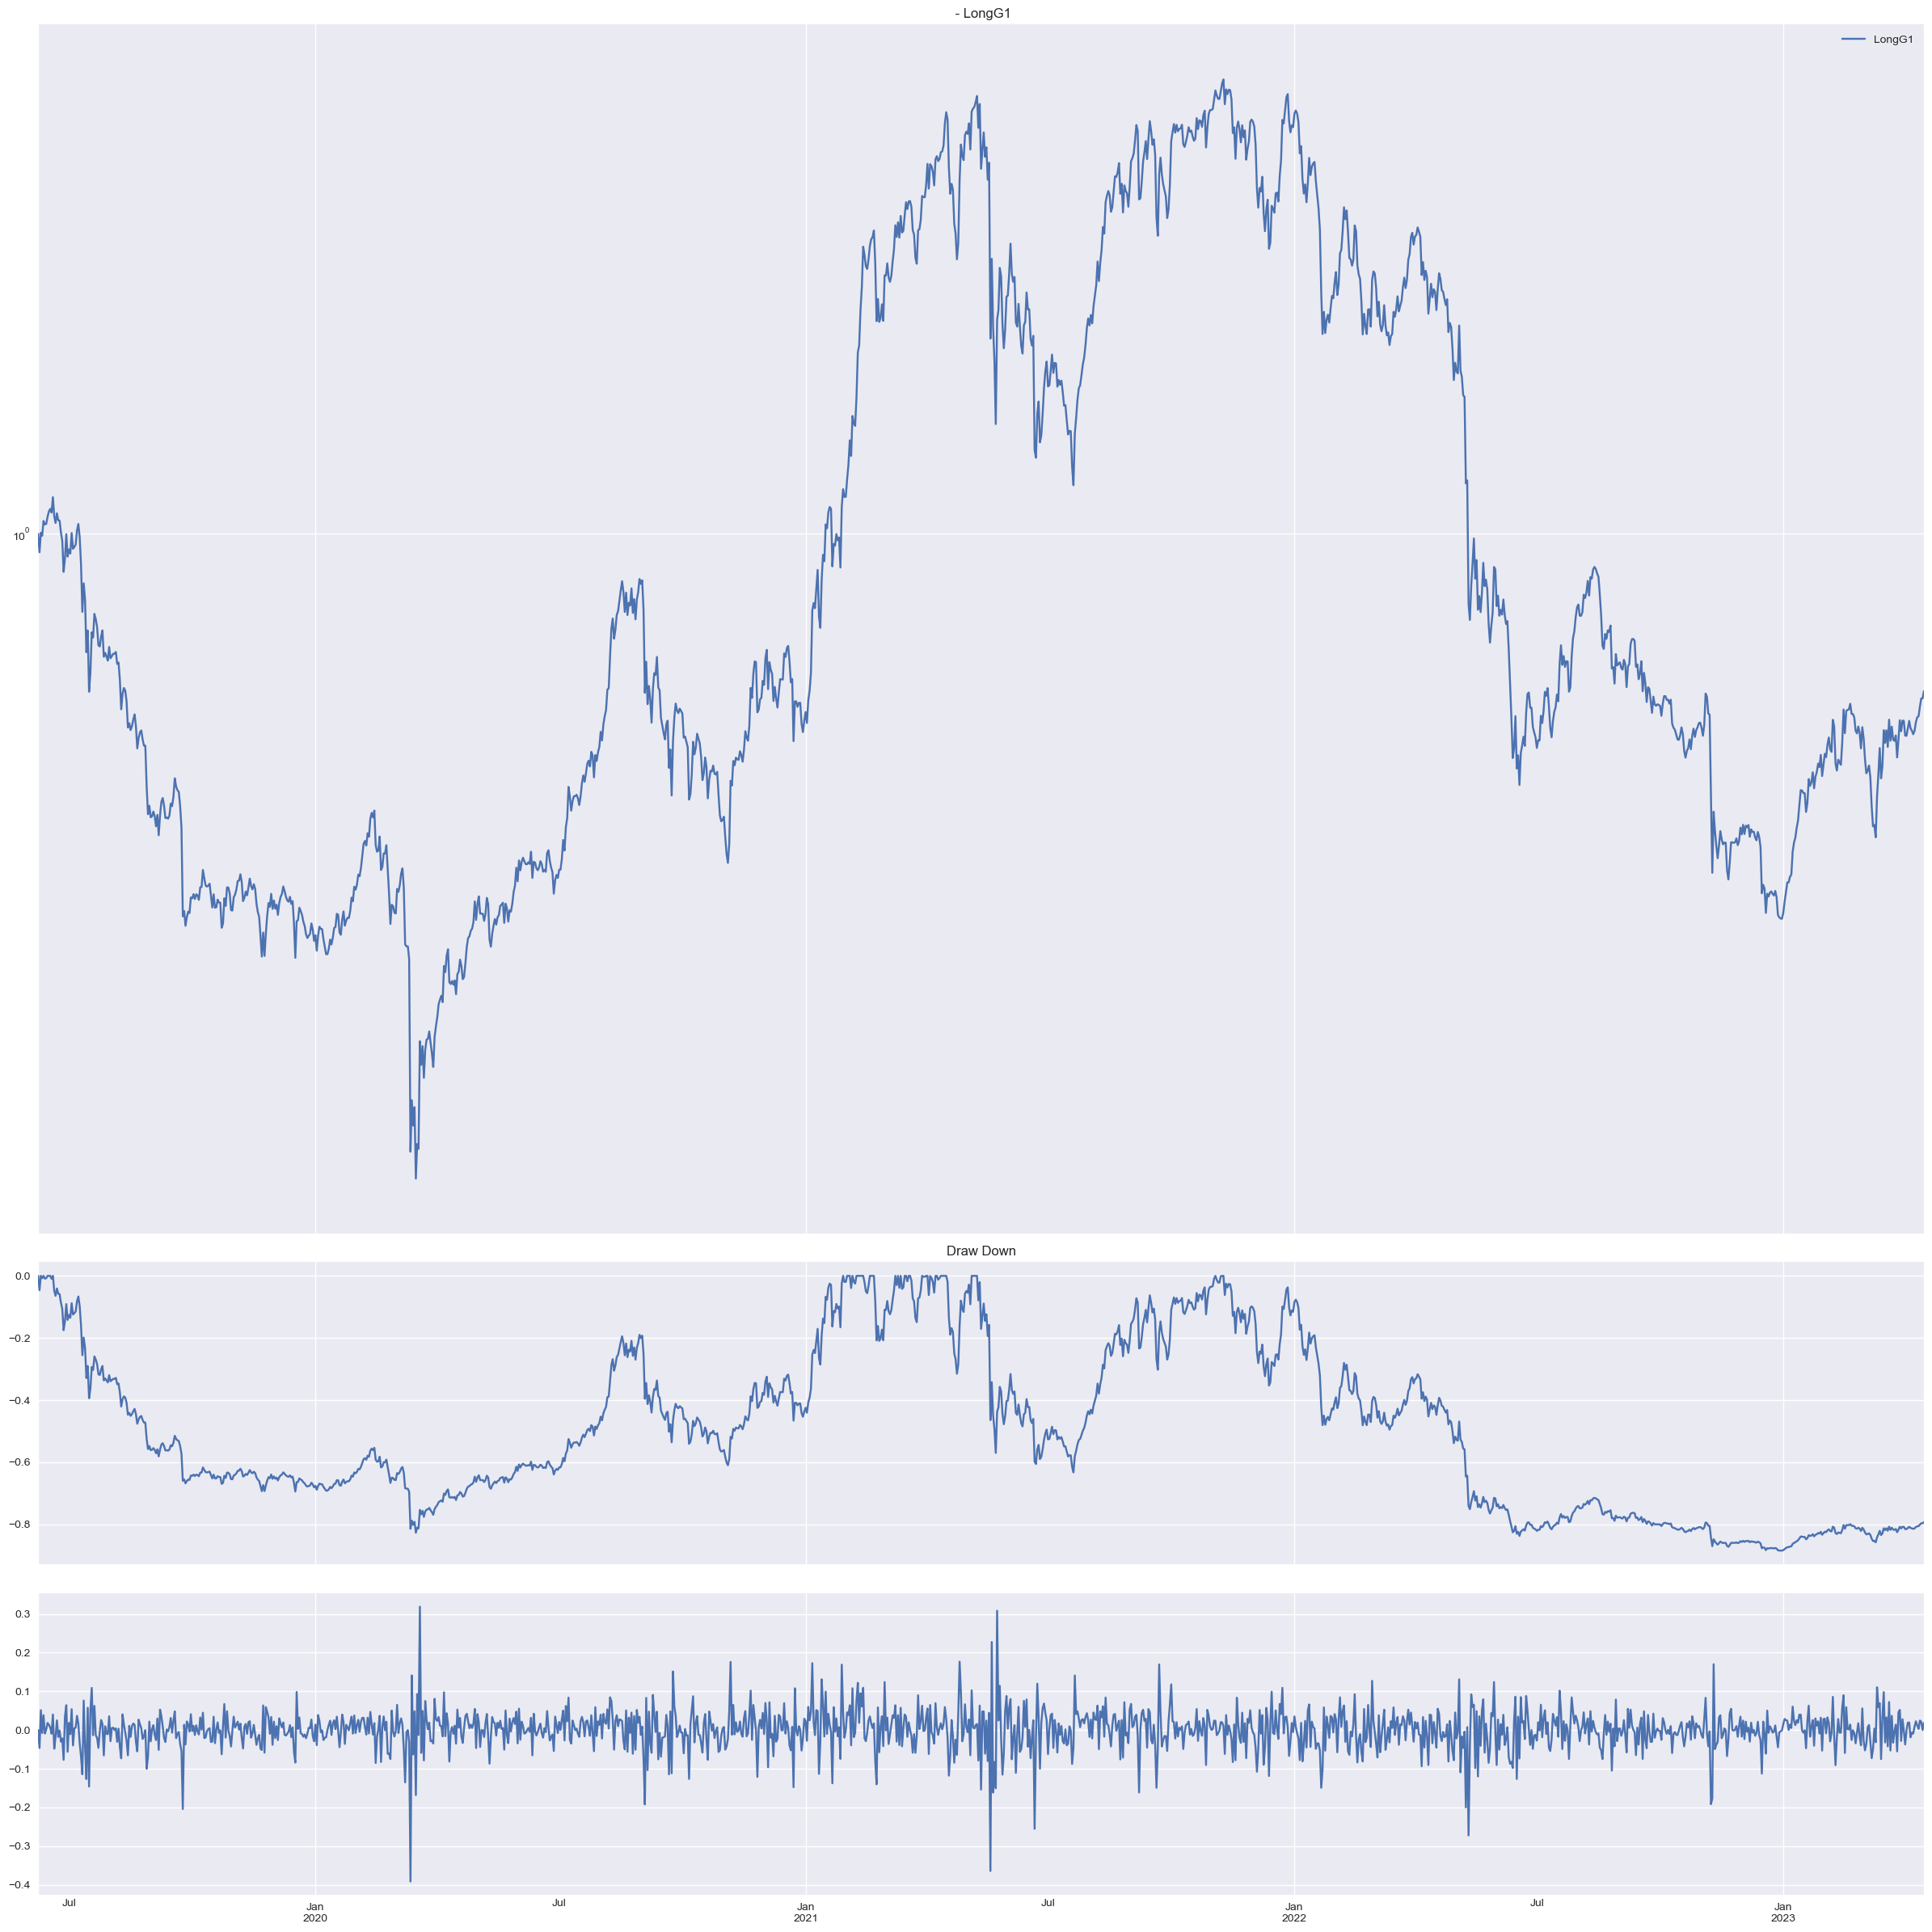

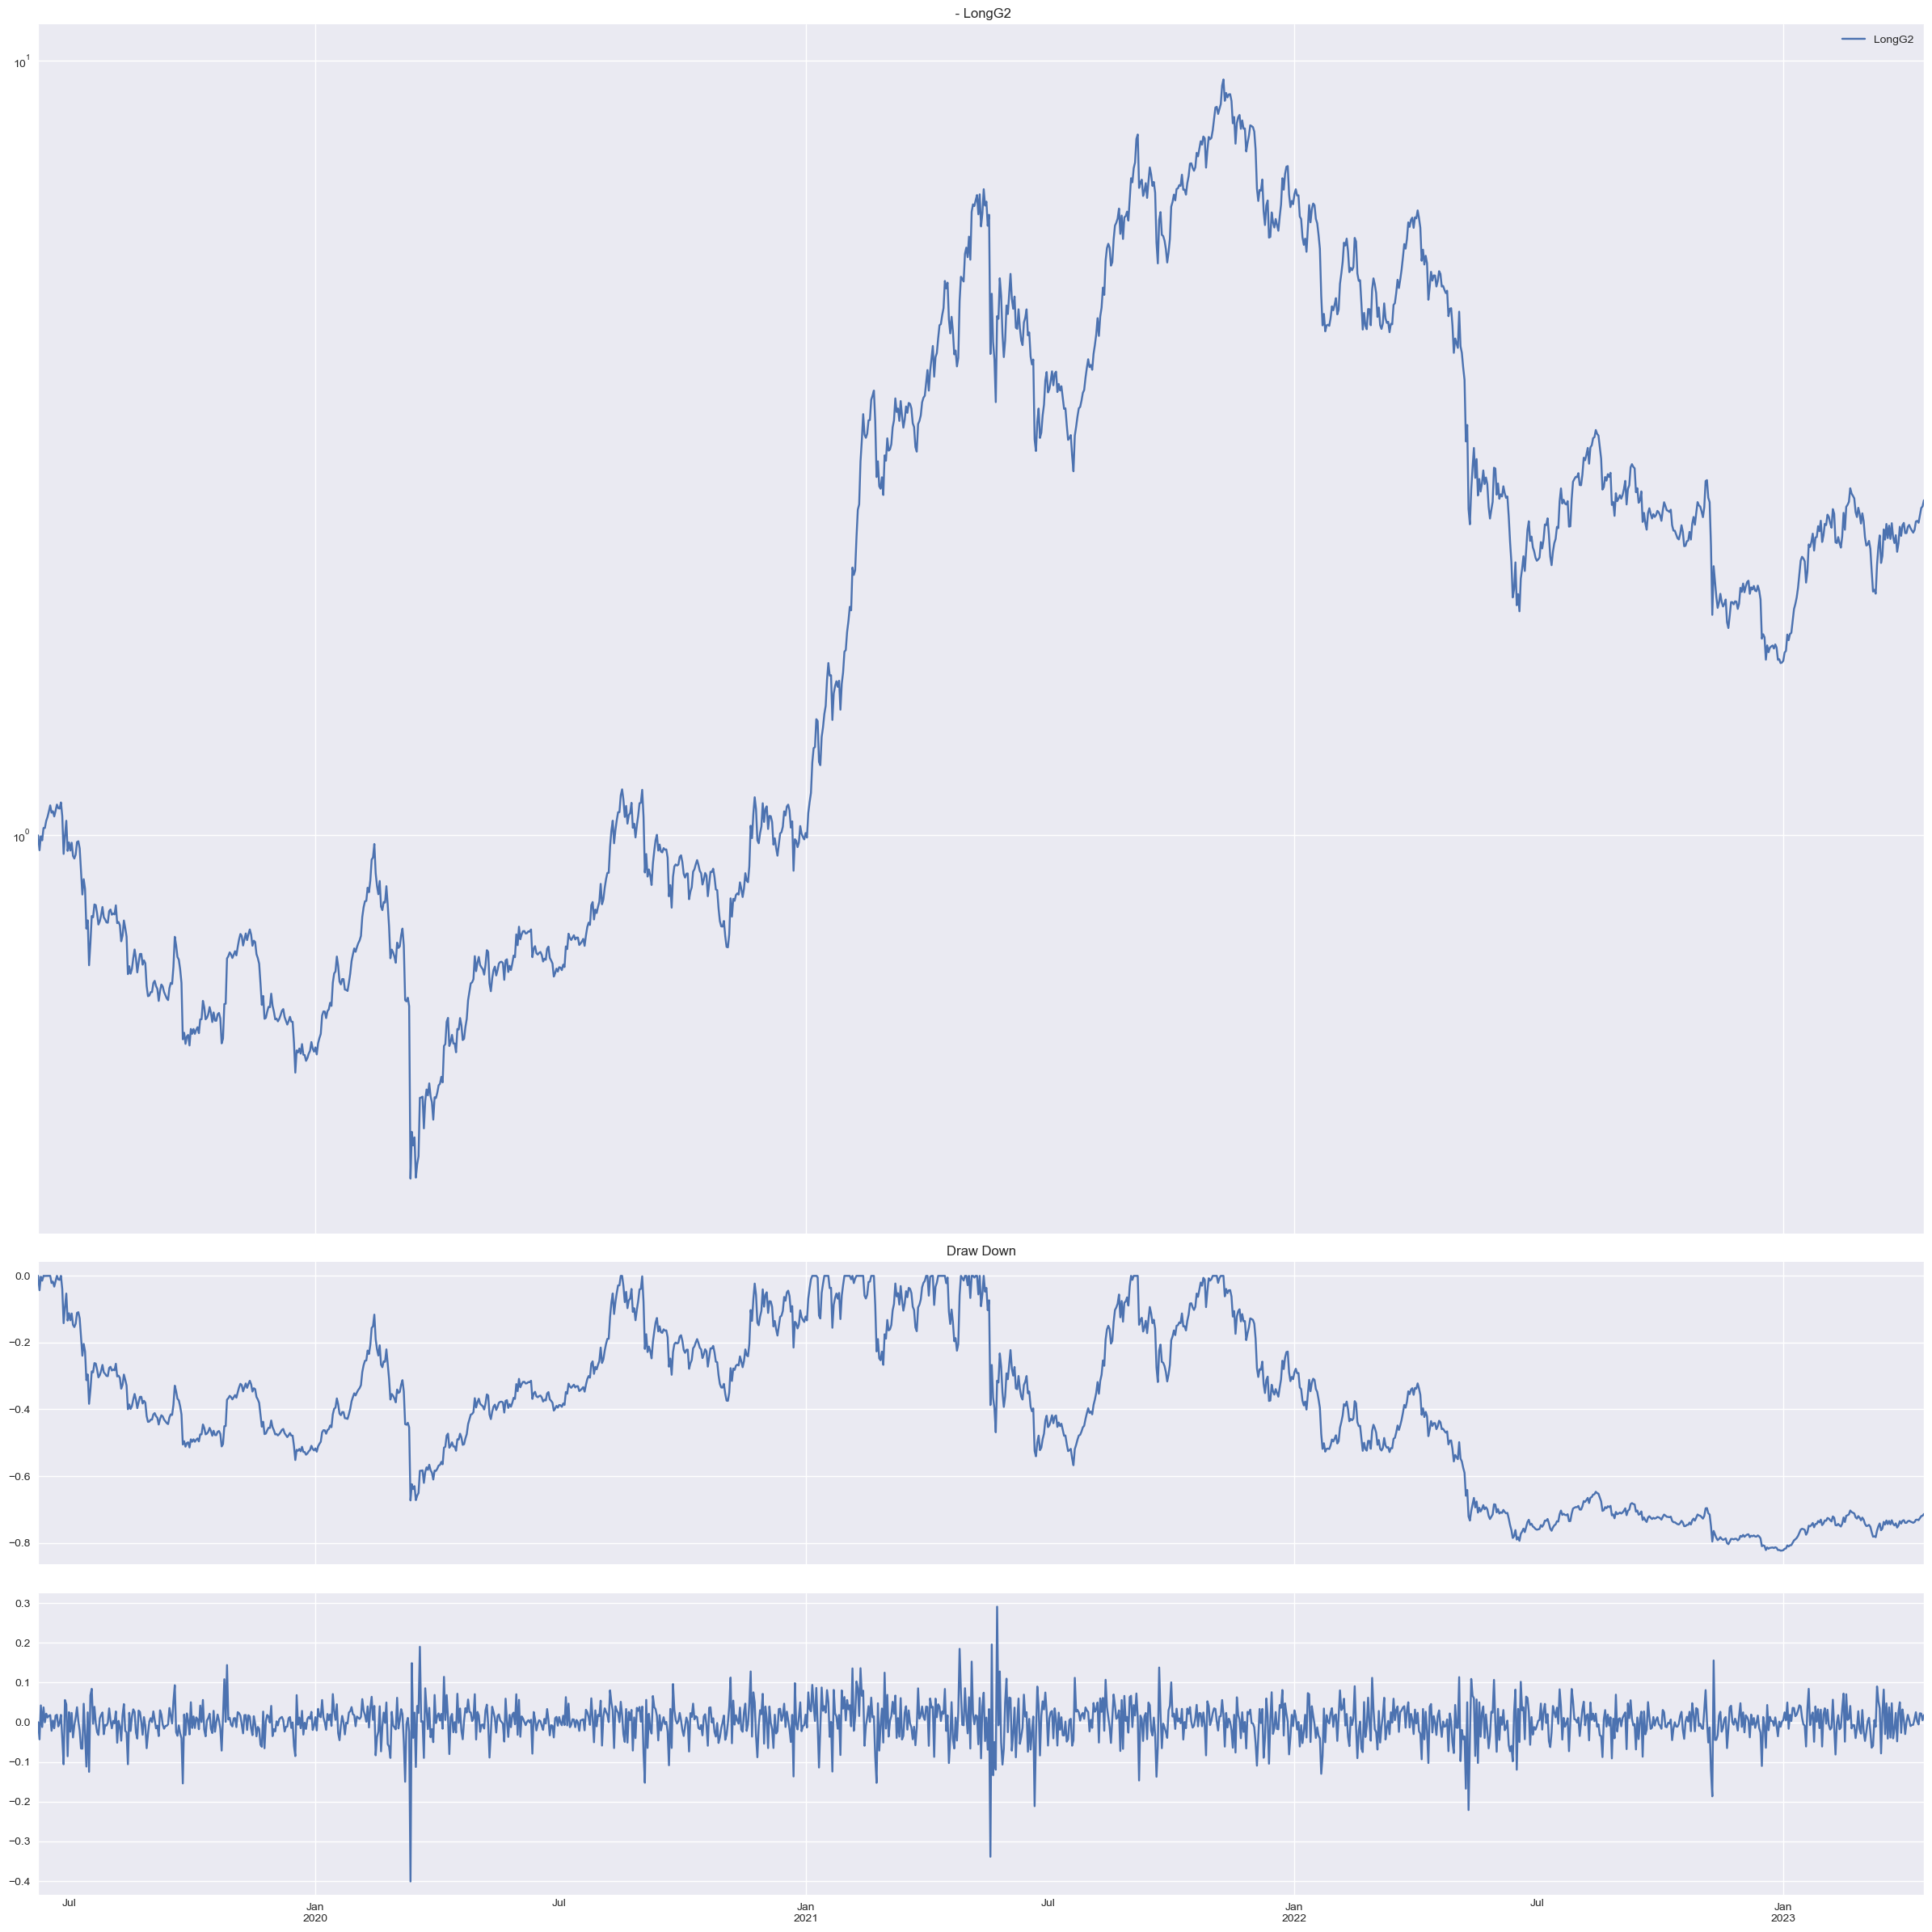

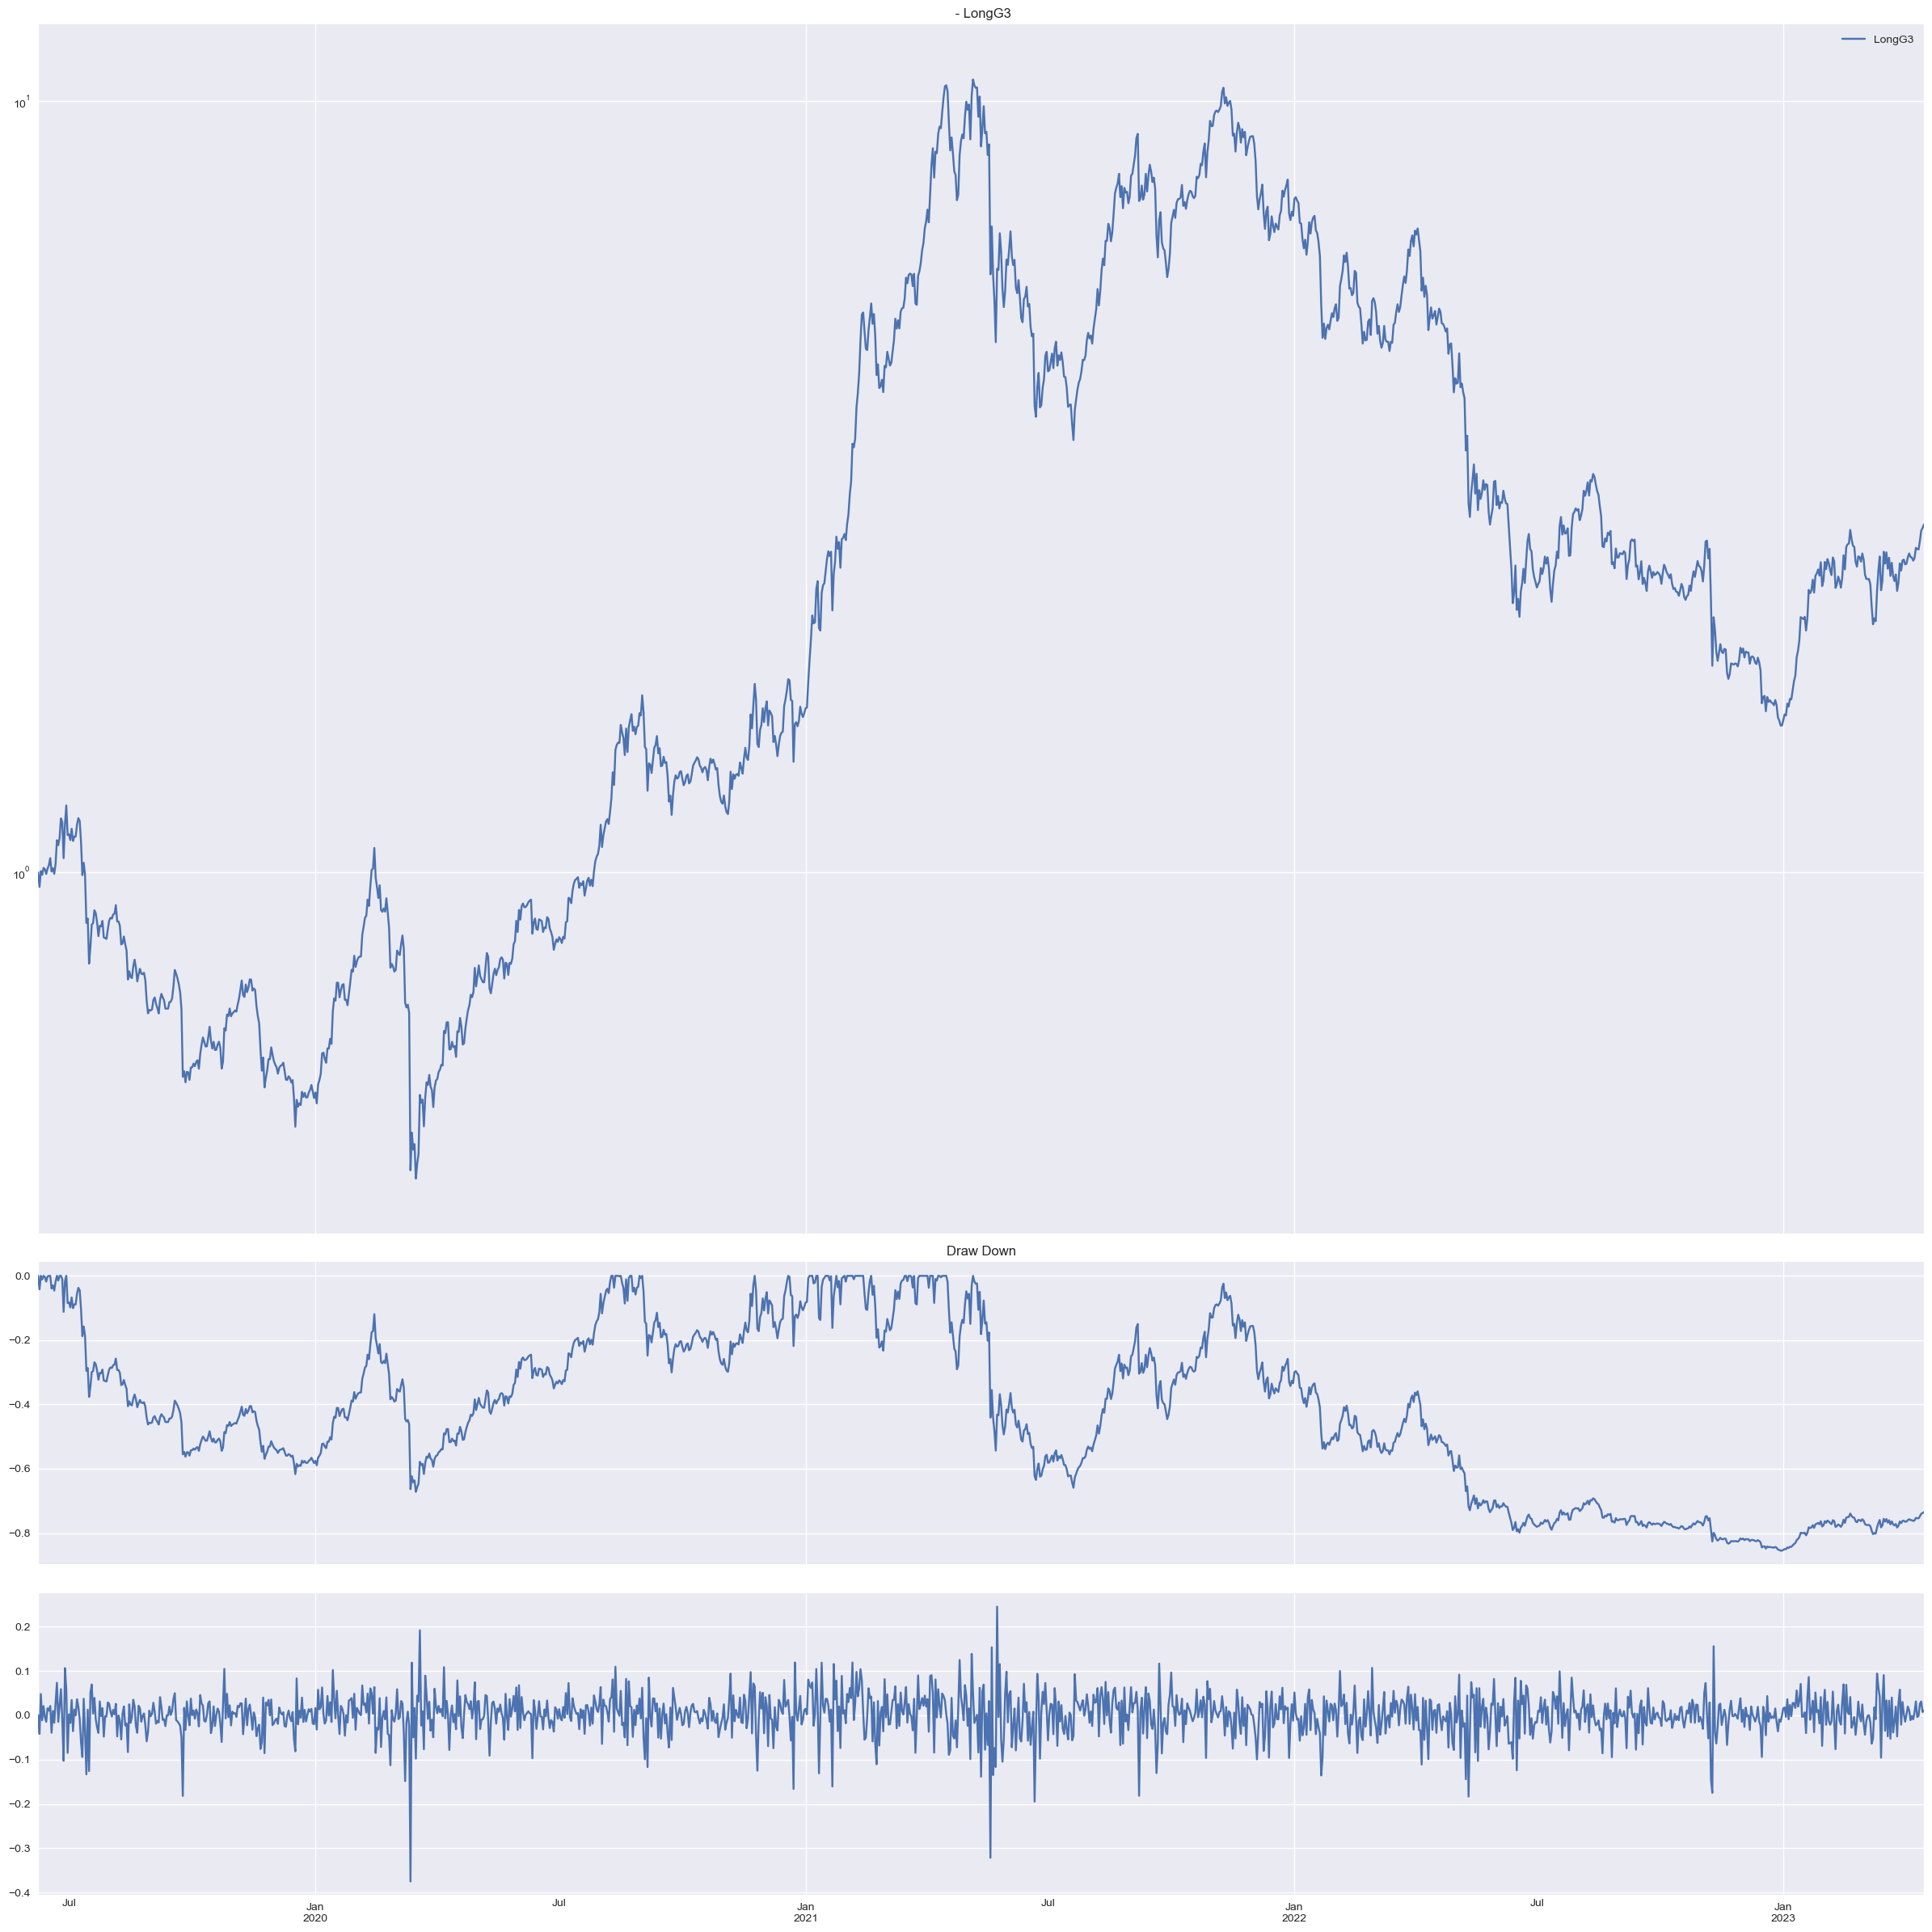

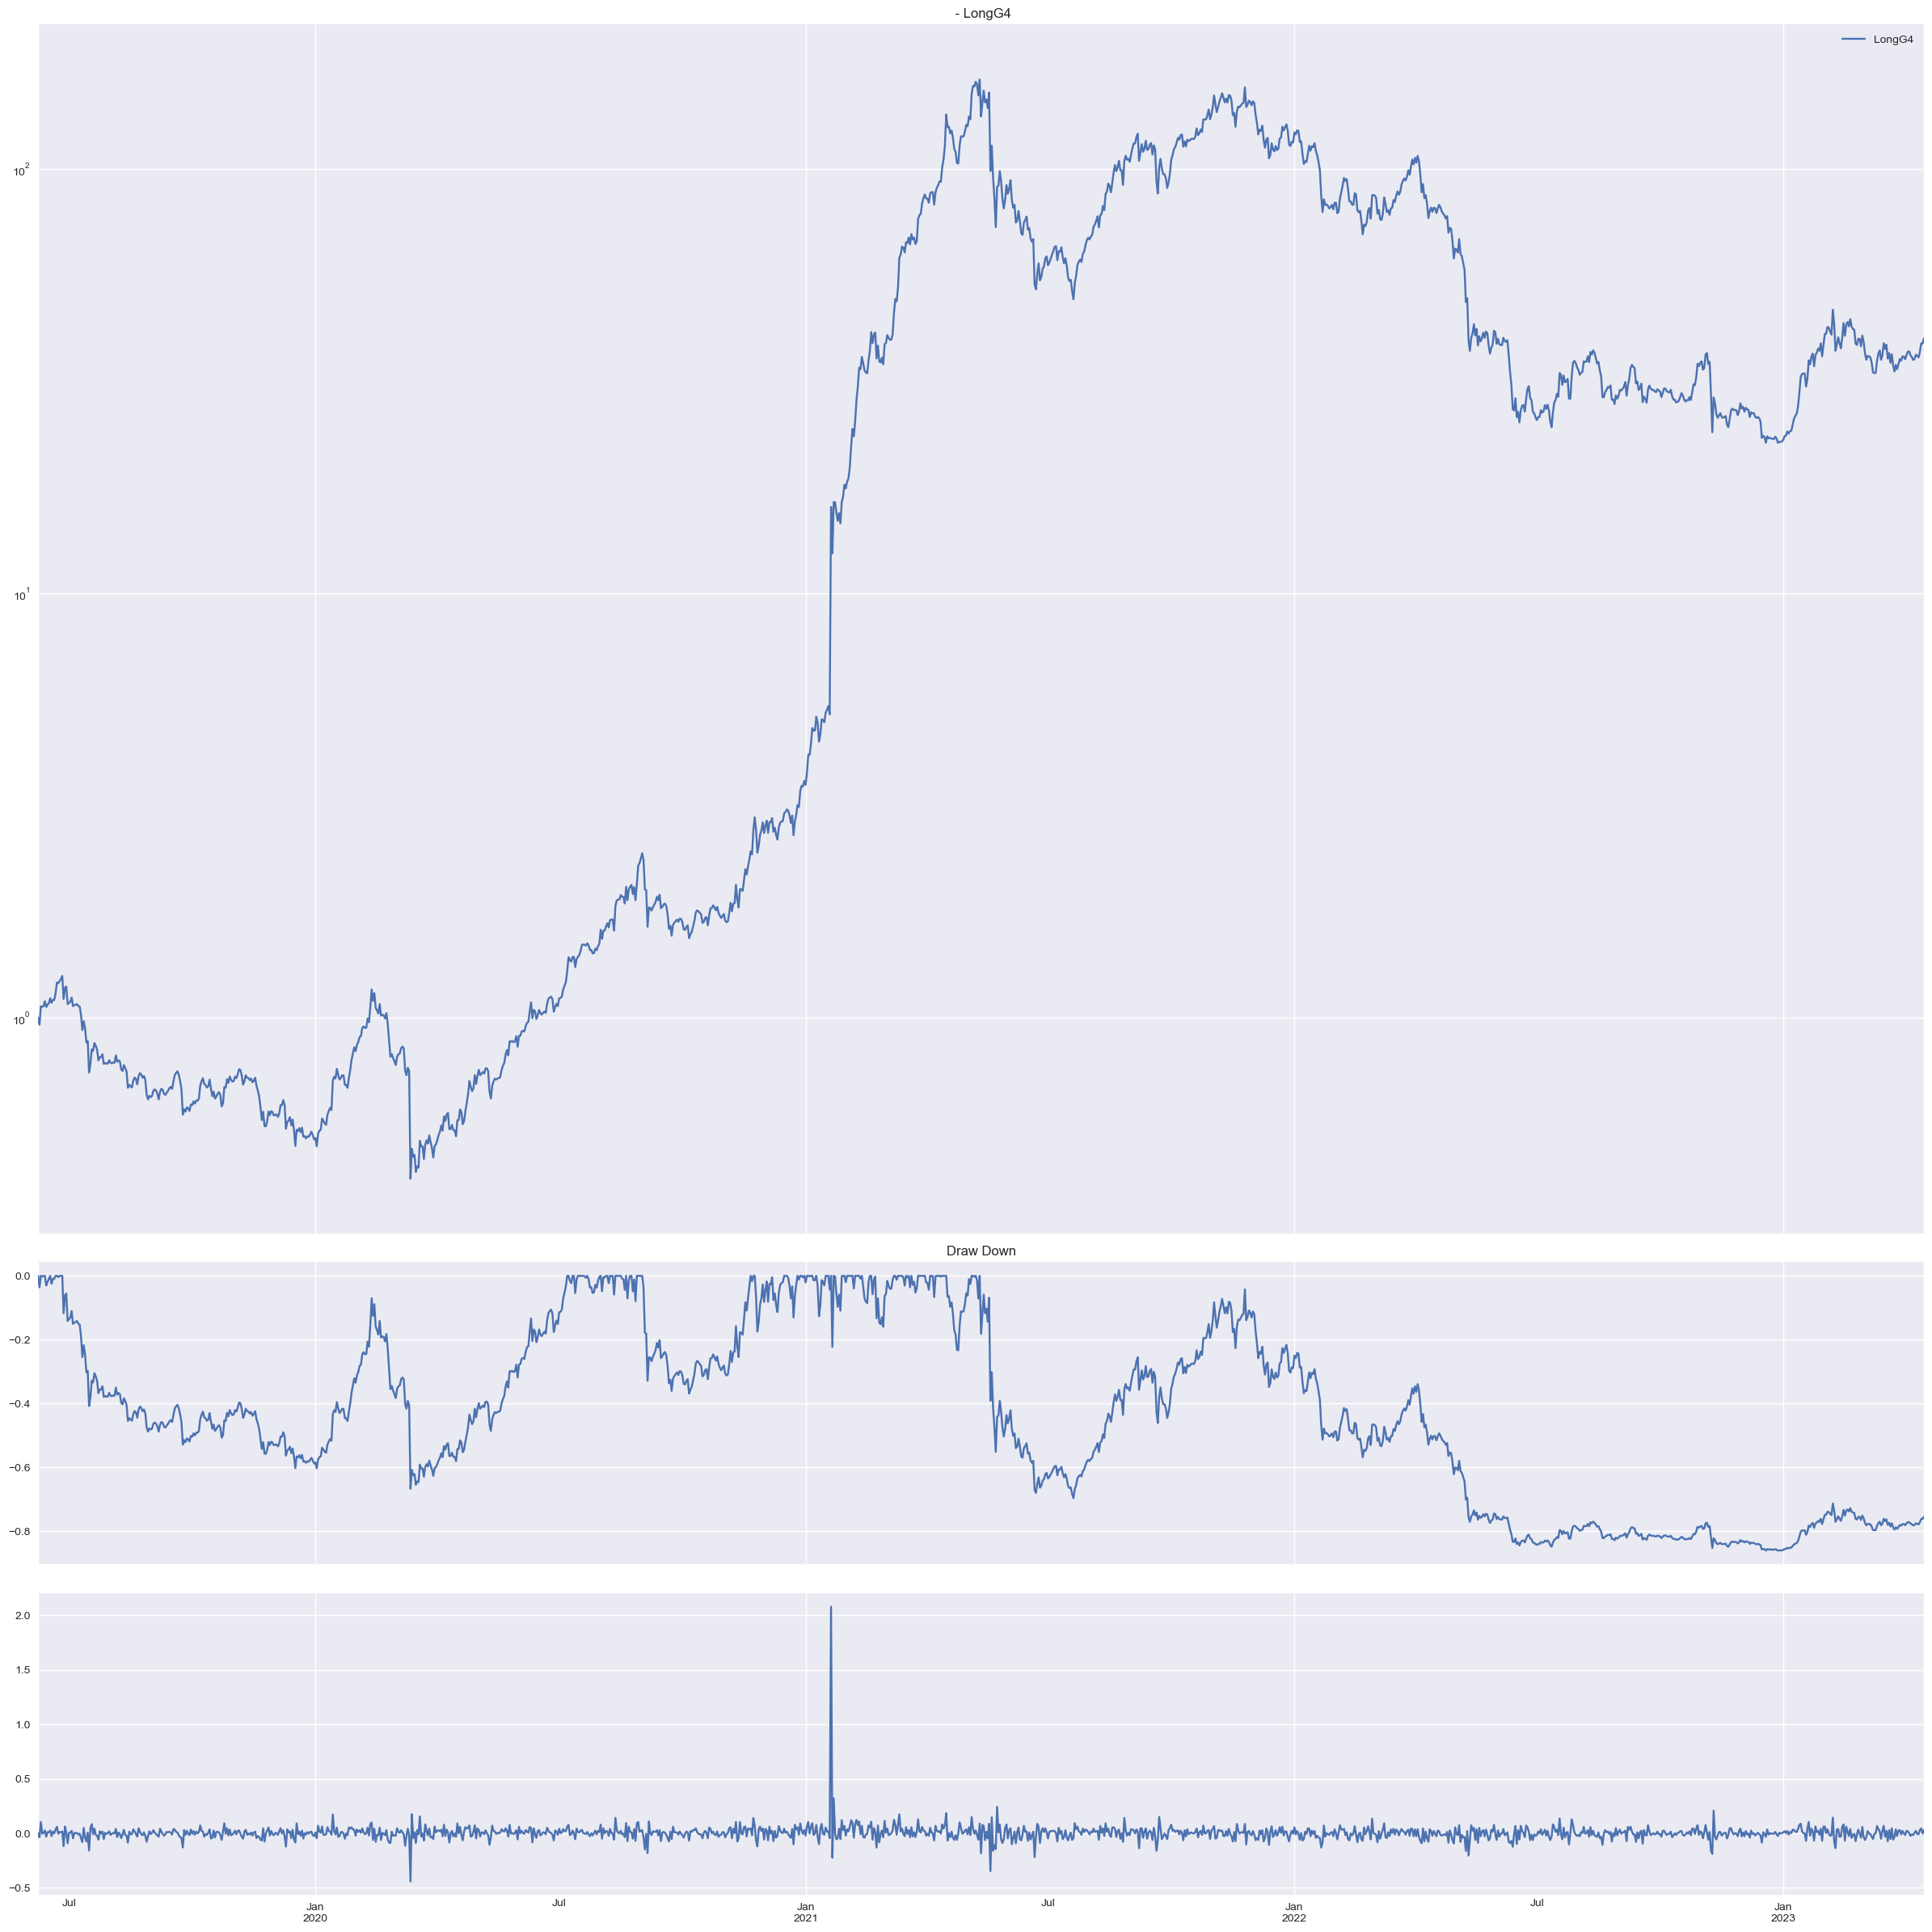

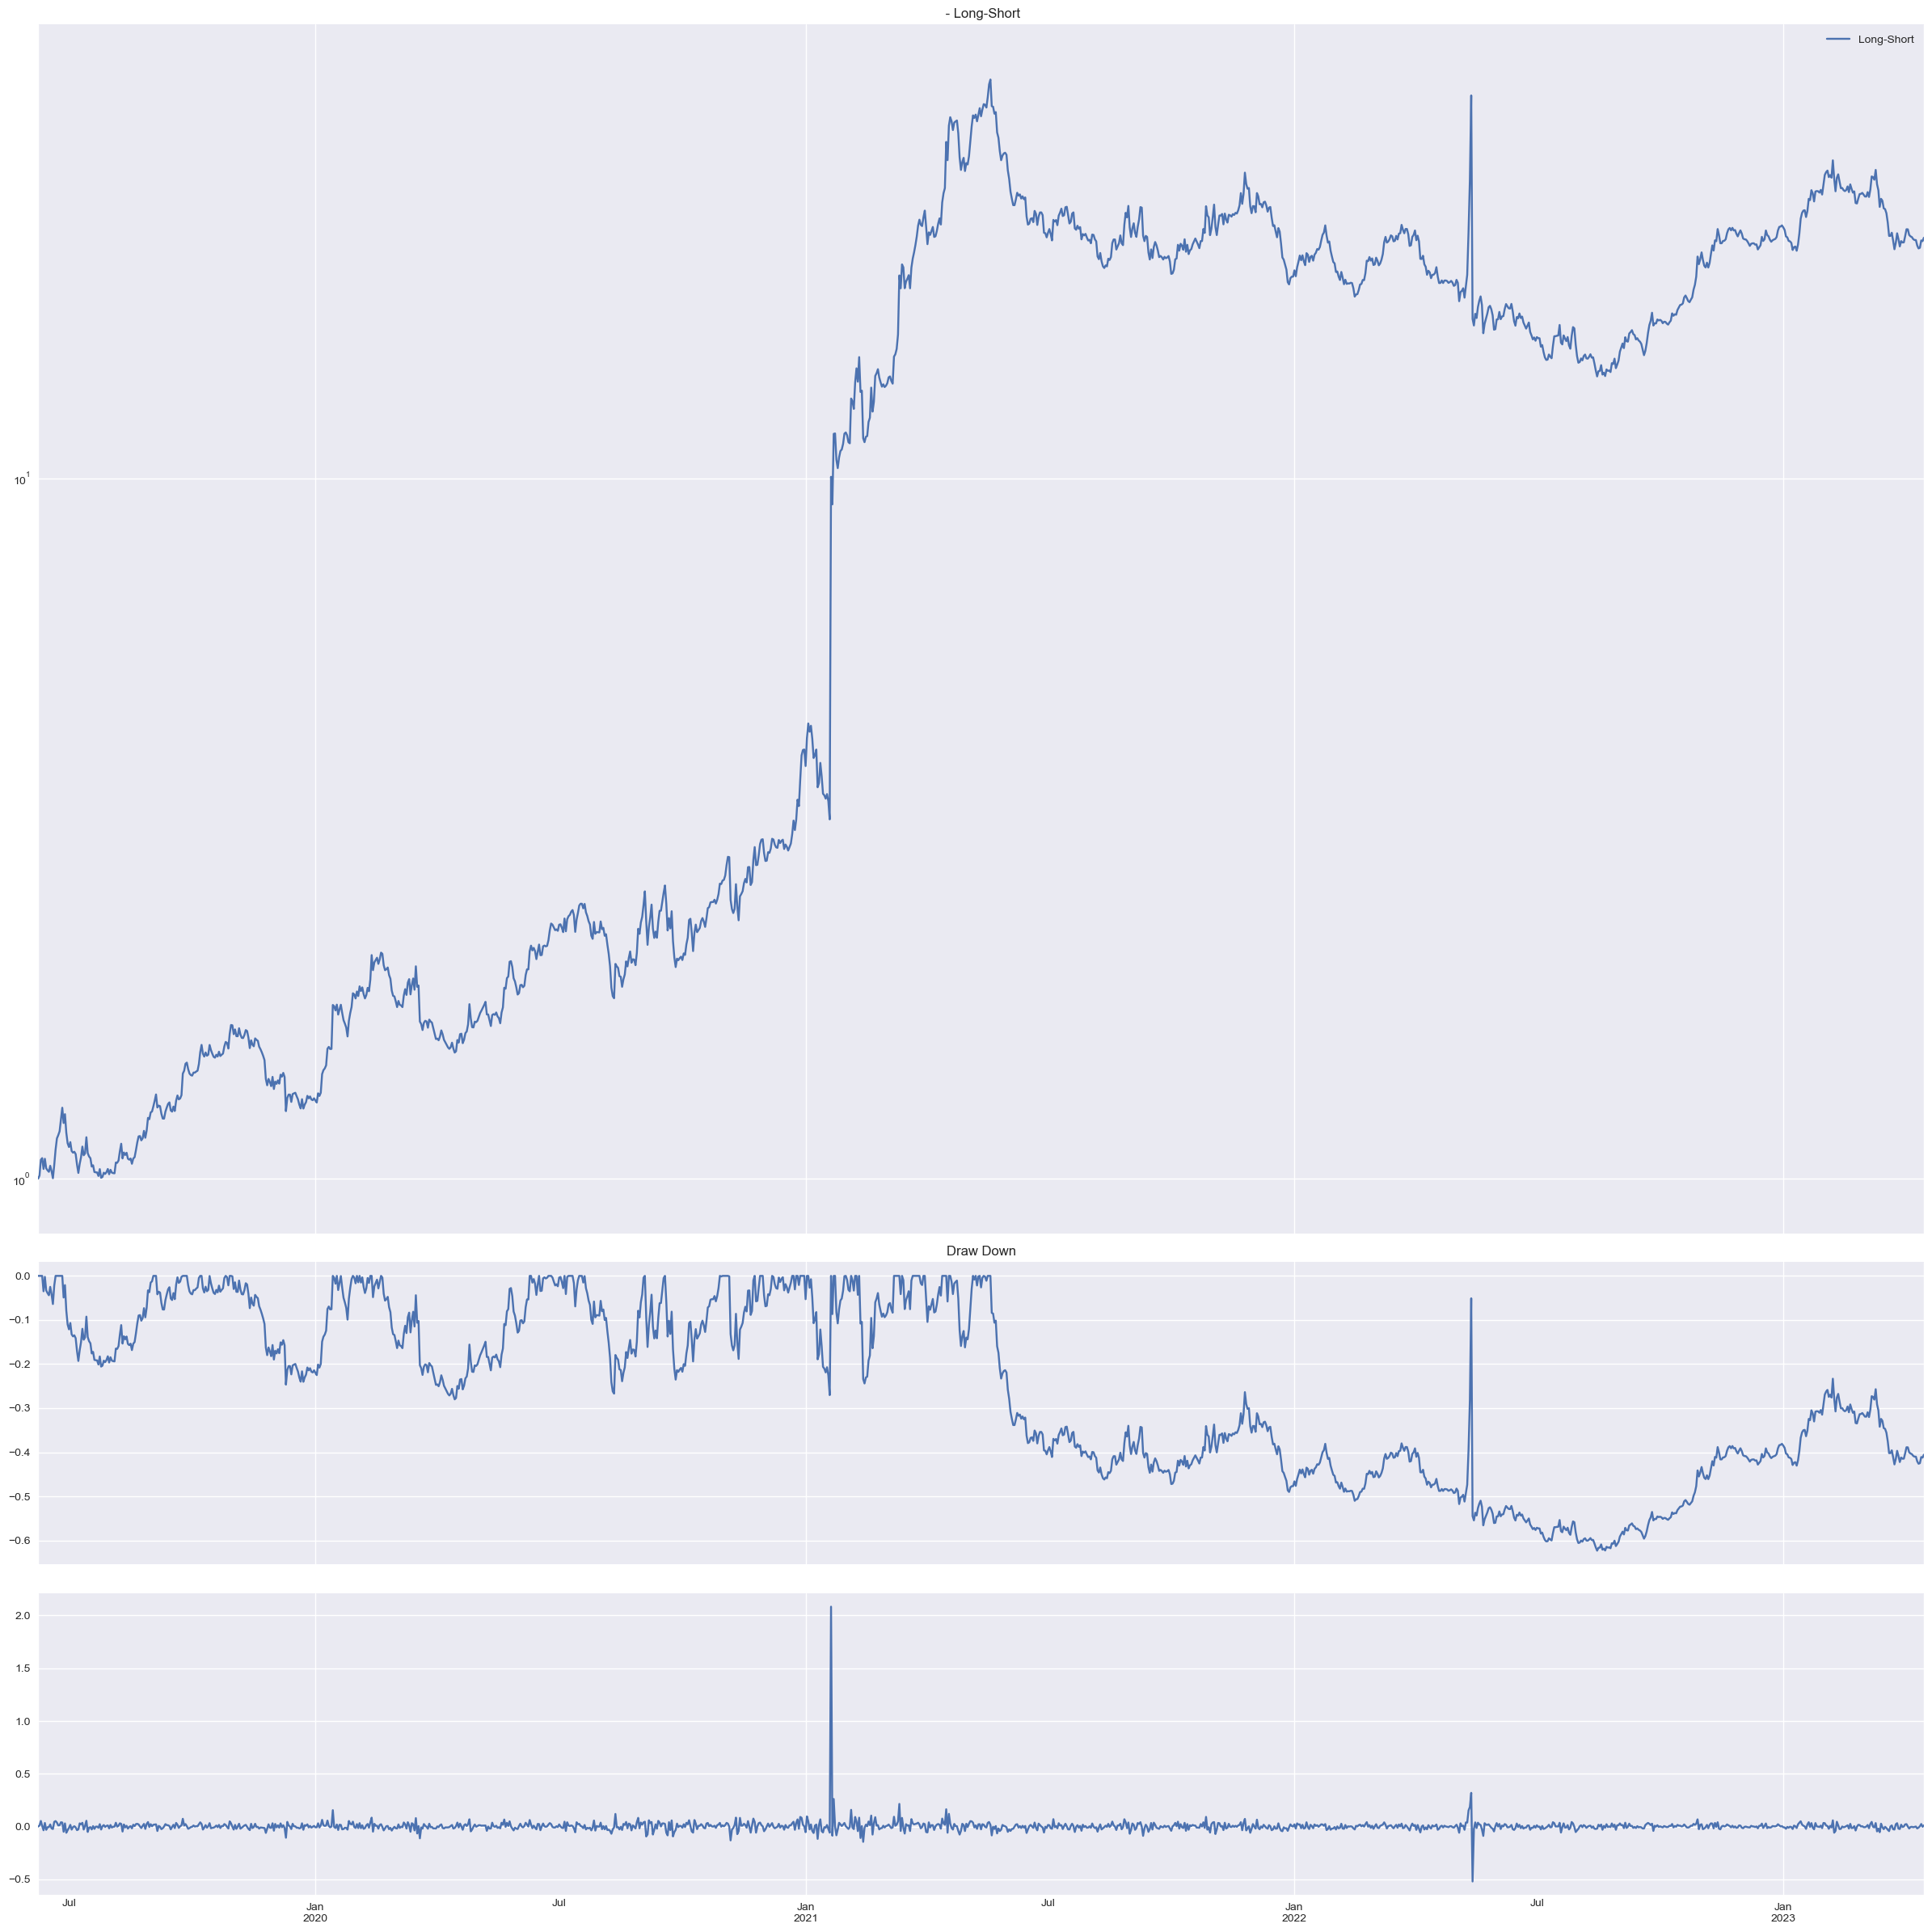

In [37]:
mytool.draw_return_result(value_weighted_cap_cmktcap_reduced["M2"], title="", 
                          )